In [72]:
import pandas as pd
import numpy as np 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score,precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# get the data
x_train = pd.read_csv("train_features.csv") 
x_test = pd.read_csv("test_features.csv") 
y_train = pd.read_csv("train_target.csv") 
y_test = pd.read_csv("test_target.csv") 

In [73]:
# traing the model
gaussian = GaussianNB()
gaussian.fit(x_train, y_train.values.ravel())
print (gaussian.class_prior_)
print(gaussian.classes_)
print(gaussian.feature_names_in_)


[0.25739645 0.25147929 0.25591716 0.2352071 ]
['bus' 'opel' 'saab' 'van']
['compactness' 'circularity' 'distance circularity' 'radius ratio'
 'pr.axis_aspect_ratio' 'max.length_aspect_ratio' 'scatter ratio'
 'elongatedness' 'pr.axis_rectangularity' 'max.length_rectangularity'
 'scaled_variance' 'scaled_variance.1' 'scaled_radius_of_gyration'
 'scaled_radius_of_gyration.1' 'skewness_about' 'skewness_about.1'
 'skewness_about.2' 'hollows_ratio']


In [74]:
# predict
Y_pred = gaussian.predict(x_test) 
print(Y_pred)

['van' 'saab' 'saab' 'opel' 'opel' 'van' 'opel' 'saab' 'opel' 'opel' 'van'
 'opel' 'bus' 'van' 'van' 'van' 'opel' 'opel' 'van' 'saab' 'bus' 'van'
 'van' 'van' 'van' 'opel' 'opel' 'van' 'opel' 'van' 'saab' 'opel' 'bus'
 'opel' 'van' 'van' 'van' 'opel' 'opel' 'bus' 'van' 'bus' 'van' 'van'
 'van' 'saab' 'opel' 'opel' 'saab' 'saab' 'van' 'opel' 'opel' 'van' 'saab'
 'opel' 'opel' 'van' 'opel' 'bus' 'van' 'saab' 'van' 'opel' 'opel' 'van'
 'opel' 'van' 'saab' 'van' 'van' 'opel' 'van' 'opel' 'opel' 'van' 'opel'
 'opel' 'van' 'van' 'opel' 'van' 'van' 'opel' 'bus' 'opel' 'opel' 'van'
 'van' 'bus' 'saab' 'bus' 'van' 'opel' 'saab' 'van' 'saab' 'opel' 'van'
 'van' 'van' 'van' 'saab' 'opel' 'van' 'van' 'opel' 'van' 'van' 'opel'
 'opel' 'van' 'opel' 'opel' 'van' 'opel' 'van' 'opel' 'van' 'opel' 'van'
 'bus' 'opel' 'van' 'van' 'saab' 'opel' 'van' 'van' 'van' 'van' 'van'
 'opel' 'van' 'van' 'bus' 'opel' 'saab' 'saab' 'opel' 'van' 'opel' 'van'
 'saab' 'opel' 'van' 'saab' 'van' 'saab' 'bus' 'saab' 'van' 

In [75]:
# calculate accuracy
accuracy_gaussian=round(accuracy_score(y_test,Y_pred)* 100, 2)

from sklearn.model_selection import cross_val_score
scoresraw = cross_val_score(gaussian, x_train ,y_train.values.ravel(), cv=10, scoring="accuracy")
print(scoresraw)
meanScoreraw= scoresraw.mean()

acc_gaussian_train = round(gaussian.score(x_train, y_train) * 100, 2)

print("Accuracy of the raw training set: ", acc_gaussian_train)
print("10-fold cross validation of the raw training set: ", meanScoreraw)
print("Accuracy of the raw testing set: ", accuracy_gaussian)

[0.39705882 0.36764706 0.61764706 0.44117647 0.41176471 0.45588235
 0.46268657 0.46268657 0.44776119 0.43283582]
Accuracy of the raw training set:  46.89
10-fold cross validation of the raw training set:  0.44971466198419663
Accuracy of the raw testing set:  43.53


In [76]:
# now i check the correlation matrix again
x_test.corr(method='pearson') 


,compactness,circularity,distance circularity,radius ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.697368,0.807272,0.767698,0.192167,0.371276,0.827852,-0.808708,0.819819,0.683443,0.798966,0.828402,0.589779,-0.211990,0.264922,0.197833,0.241979,0.298382
circularity,0.697368,1.000000,0.799187,0.628771,0.126944,0.489821,0.862423,-0.825263,0.856517,0.964742,0.822281,0.853604,0.939609,0.070118,0.157464,-0.013618,-0.156489,-0.016362
distance circularity,0.807272,0.799187,1.000000,0.825135,0.238246,0.592961,0.902277,-0.914975,0.888779,0.783073,0.866738,0.876875,0.712347,-0.262428,0.173335,0.282804,0.126514,0.309509
radius ratio,0.767698,0.628771,0.825135,1.000000,0.641883,0.431689,0.764375,-0.840122,0.730363,0.570185,0.764581,0.741381,0.544061,-0.441715,0.065188,0.233743,0.411396,0.489359
pr.axis_aspect_ratio,0.192167,0.126944,0.238246,0.641883,1.000000,0.234508,0.109530,-0.236461,0.071248,0.088535,0.127829,0.082633,0.094671,-0.441661,-0.034258,0.038879,0.470506,0.484489
max.length_aspect_ratio,0.371276,0.489821,0.592961,0.431689,0.234508,1.000000,0.404008,-0.429365,0.390540,0.573873,0.338099,0.359360,0.381883,-0.285511,0.147342,0.150723,0.054871,0.342595
scatter ratio,0.827852,0.862423,0.902277,0.764375,0.109530,0.404008,1.000000,-0.969282,0.991957,0.819513,0.981572,0.995895,0.805082,0.024380,0.061802,0.209579,-0.051500,0.048677
elongatedness,-0.808708,-0.825263,-0.914975,-0.840122,-0.236461,-0.429365,-0.969282,1.000000,-0.943270,-0.778912,-0.962142,-0.948812,-0.765271,0.096252,-0.044581,-0.200787,-0.072861,-0.163981
pr.axis_rectangularity,0.819819,0.856517,0.888779,0.730363,0.071248,0.390540,0.991957,-0.943270,1.000000,0.815454,0.969027,0.993113,0.802537,0.050016,0.066989,0.201876,-0.087192,0.019471
max.length_rectangularity,0.683443,0.964742,0.783073,0.570185,0.088535,0.573873,0.819513,-0.778912,0.815454,1.000000,0.760414,0.805881,0.875235,0.029956,0.166665,0.002712,-0.135343,0.042540


In [77]:
## now i am going to drop attributes with high correlation with other attributes
x_train_small = x_train.drop(['circularity', 'scatter ratio', 'pr.axis_rectangularity', 'scaled_variance.1'], axis=1)
x_test_small = x_test.drop(['circularity', 'scatter ratio', 'pr.axis_rectangularity', 'scaled_variance.1'], axis=1)

print(x_test_small.shape)

(170, 14)


In [78]:
# repeat the process for the smaller dataset 
# traininig
gaussian = GaussianNB()
gaussian.fit(x_train_small, y_train.values.ravel())
print (gaussian.class_prior_)
print(gaussian.classes_)
print(gaussian.feature_names_in_)

[0.25739645 0.25147929 0.25591716 0.2352071 ]
['bus' 'opel' 'saab' 'van']
['compactness' 'distance circularity' 'radius ratio'
 'pr.axis_aspect_ratio' 'max.length_aspect_ratio' 'elongatedness'
 'max.length_rectangularity' 'scaled_variance' 'scaled_radius_of_gyration'
 'scaled_radius_of_gyration.1' 'skewness_about' 'skewness_about.1'
 'skewness_about.2' 'hollows_ratio']


In [79]:
# calculate accuracy
acc_gaussian_train = round(gaussian.score(x_train_small, y_train) * 100, 2)

print("Accuracy of the small training set: ", acc_gaussian_train)


# now validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gaussian, x_train_small,y_train.values.ravel(), cv=10, scoring="accuracy")
print(scores)
meanScore= scores.mean()
print('results of 10-fold cross validation: ', meanScore*100)



Accuracy of the small training set:  55.62
[0.52941176 0.42647059 0.63235294 0.61764706 0.5        0.45588235
 0.55223881 0.59701493 0.52238806 0.56716418]
results of 10-fold cross validation:  54.005706760316066


In [80]:
# test
Y_pred = gaussian.predict(x_test_small) 
print(Y_pred)
accuracy_gaussian=round(accuracy_score(y_test,Y_pred)* 100, 2)




print("Accuracy of the small testing set: ", accuracy_gaussian)

['van' 'opel' 'saab' 'opel' 'opel' 'bus' 'bus' 'opel' 'opel' 'opel' 'van'
 'opel' 'bus' 'bus' 'van' 'van' 'opel' 'opel' 'van' 'saab' 'bus' 'bus'
 'van' 'van' 'van' 'opel' 'opel' 'van' 'opel' 'bus' 'saab' 'saab' 'bus'
 'opel' 'saab' 'saab' 'van' 'opel' 'opel' 'bus' 'van' 'bus' 'van' 'saab'
 'van' 'saab' 'opel' 'opel' 'saab' 'saab' 'opel' 'opel' 'opel' 'bus'
 'opel' 'opel' 'opel' 'van' 'opel' 'bus' 'van' 'saab' 'van' 'opel' 'bus'
 'van' 'opel' 'bus' 'saab' 'van' 'bus' 'opel' 'van' 'opel' 'bus' 'bus'
 'opel' 'opel' 'bus' 'van' 'opel' 'van' 'van' 'opel' 'opel' 'opel' 'opel'
 'van' 'saab' 'bus' 'opel' 'bus' 'van' 'saab' 'saab' 'van' 'saab' 'opel'
 'van' 'van' 'van' 'van' 'saab' 'opel' 'bus' 'van' 'opel' 'van' 'van'
 'opel' 'opel' 'bus' 'opel' 'opel' 'bus' 'opel' 'van' 'opel' 'van' 'opel'
 'saab' 'bus' 'opel' 'van' 'van' 'opel' 'opel' 'van' 'bus' 'van' 'bus'
 'van' 'opel' 'van' 'van' 'bus' 'opel' 'saab' 'saab' 'opel' 'van' 'opel'
 'van' 'saab' 'opel' 'van' 'saab' 'van' 'bus' 'bus' 'saab' 'va

In [81]:
## now i am going to check skewness and decide which attributes to log-transform  
x_train.skew()


compactness                    0.401900
circularity                    0.279095
distance circularity           0.153027
radius ratio                   0.503433
pr.axis_aspect_ratio           4.031596
max.length_aspect_ratio        6.544715
scatter ratio                  0.610590
elongatedness                  0.017926
pr.axis_rectangularity         0.759659
max.length_rectangularity      0.261830
scaled_variance                0.664798
scaled_variance.1              0.826342
scaled_radius_of_gyration      0.298616
scaled_radius_of_gyration.1    2.293085
skewness_about                 0.768155
skewness_about.1               0.758935
skewness_about.2               0.246398
hollows_ratio                 -0.209039
dtype: float64

In [82]:
# next i will log_transform skewed attributes
x_train_small['pr.axis aspect ratio log'] = np.log(x_train_small['pr.axis_aspect_ratio'])
x_train_small['max.length_aspect_ratio  log'] = np.log(x_train_small['max.length_aspect_ratio'])
#x_train_small['pr axis rectangularity log'] = np.log(x_train_small['pr.axis_rectangularity'])
#x_train_small['scaled_variance.1 log'] = np.log(x_train_small['scaled_variance.1'])
#x_train_small['scaled_variance.1 log'] = np.log(x_train_small['scaled_variance.1'])
x_train_small['scaled_radius_of_gyration.1 log'] = np.log(x_train_small['scaled_radius_of_gyration.1'])

#x_train_small['skewness_about log'] = np.log(x_train_small['skewness_about']+0.000001)
#x_train_small['skewness_about.1 log'] = np.log(x_train_small['skewness_about.1']+0.000001)

# drop the original attributes after log_transformation
x_train_sml_log = x_train_small.drop("pr.axis_aspect_ratio", axis=1)
x_train_sml_log = x_train_sml_log.drop("max.length_aspect_ratio", axis=1)

#x_train_sml_log = x_train_sml_log.drop("pr.axis_rectangularity.1", axis=1)
#x_train_sml_log = x_train_sml_log.drop("scaled_variance.1", axis=1)
x_train_sml_log = x_train_sml_log.drop("scaled_radius_of_gyration.1", axis=1)
#x_train_sml_log = x_train_sml_log.drop("skewness_about", axis=1)
#x_train_sml_log = x_train_sml_log.drop("skewness_about.1", axis=1)



# i will do the same for the testing set
x_test_small['pr.axis aspect ratio log'] = np.log(x_test_small['pr.axis_aspect_ratio'])
x_test_small['max.length_aspect_ratio  log'] = np.log(x_test_small['max.length_aspect_ratio'])
#x_test_small['pr axis rectangularity log'] = np.log(df_small['pr.axis_rectangularity'])
#x_test_small['scaled_variance log'] = np.log(x_test_small['scaled_variance'])
#x_test_small['scaled_variance.1 log'] = np.log(x_train_small['scaled_variance.1'])
x_test_small['scaled_radius_of_gyration.1 log'] = np.log(x_test_small['scaled_radius_of_gyration.1'])

#x_test_small['skewness_about log'] = np.log(x_test_small['skewness_about']+0.000001)
#x_test_small['skewness_about.1 log'] = np.log(x_test_small['skewness_about.1']+0.000001)

# drop the original attributes after log_transformation
x_test_sml_log = x_test_small.drop("pr.axis_aspect_ratio", axis=1)
x_test_sml_log = x_test_sml_log.drop("max.length_aspect_ratio", axis=1)
#x_test_sml_log = x_test_sml_log.drop("scaled_variance", axis=1)
#x_test_sml_log = df_sml_log.drop("scaled_variance.1", axis=1)
x_test_sml_log = x_test_sml_log.drop("scaled_radius_of_gyration.1", axis=1)
#x_test_sml_log = x_test_sml_log.drop("skewness_about", axis=1)
#x_test_sml_log = x_test_sml_log.drop("skewness_about.1", axis=1)

In [83]:
# repeat the same process 
# train with the smaller dataset log transformed
gaussian = GaussianNB()

gaussian.fit(x_train_sml_log, y_train.values.ravel())
print ('Priors used for this model: ', gaussian.class_prior_)
print('The list of classes: ', gaussian.classes_)
print('The attribute names: ', gaussian.feature_names_in_)

Priors used for this model:  [0.25739645 0.25147929 0.25591716 0.2352071 ]
The list of classes:  ['bus' 'opel' 'saab' 'van']
The attribute names:  ['compactness' 'distance circularity' 'radius ratio' 'elongatedness'
 'max.length_rectangularity' 'scaled_variance' 'scaled_radius_of_gyration'
 'skewness_about' 'skewness_about.1' 'skewness_about.2' 'hollows_ratio'
 'pr.axis aspect ratio log' 'max.length_aspect_ratio  log'
 'scaled_radius_of_gyration.1 log']


In [84]:
acc_gaussian_train = round(gaussian.score(x_train_sml_log, y_train) * 100, 2)
print("Accuracy of the small logtransformed training set: ", acc_gaussian_train)

Accuracy of the small logtransformed training set:  58.28


In [86]:
# validation using k-fold cross validation
scores = cross_val_score(gaussian, x_train_sml_log,y_train.values.ravel(), cv=10, scoring="accuracy")
print(scores)
meanScore= scores.mean()
print('results of 10-fold cross validation: ', meanScore*100)

[0.55882353 0.5        0.70588235 0.58823529 0.51470588 0.5
 0.55223881 0.62686567 0.58208955 0.56716418]
results of 10-fold cross validation:  56.96005267778753


In [87]:
# checking the model accuracy
Y_pred = gaussian.predict(x_test_sml_log) 
print(Y_pred)
accuracy_gaussian=round(accuracy_score(y_test,Y_pred)* 100, 2)

print("Accuracy of the small log transformed testing set: ", accuracy_gaussian)

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

['van' 'opel' 'saab' 'opel' 'opel' 'bus' 'bus' 'opel' 'opel' 'opel' 'van'
 'opel' 'bus' 'van' 'van' 'van' 'bus' 'opel' 'van' 'saab' 'bus' 'bus'
 'van' 'van' 'van' 'opel' 'opel' 'van' 'opel' 'bus' 'saab' 'saab' 'bus'
 'opel' 'saab' 'opel' 'van' 'opel' 'opel' 'bus' 'van' 'bus' 'van' 'saab'
 'van' 'saab' 'opel' 'opel' 'opel' 'saab' 'opel' 'opel' 'opel' 'bus'
 'opel' 'opel' 'opel' 'van' 'opel' 'bus' 'van' 'opel' 'van' 'opel' 'bus'
 'van' 'opel' 'bus' 'saab' 'van' 'bus' 'opel' 'van' 'opel' 'bus' 'bus'
 'opel' 'opel' 'bus' 'van' 'opel' 'van' 'van' 'opel' 'opel' 'opel' 'opel'
 'van' 'van' 'bus' 'opel' 'bus' 'van' 'opel' 'saab' 'van' 'saab' 'opel'
 'van' 'van' 'van' 'van' 'saab' 'opel' 'bus' 'van' 'opel' 'van' 'van'
 'opel' 'opel' 'bus' 'opel' 'opel' 'bus' 'opel' 'van' 'opel' 'van' 'opel'
 'van' 'van' 'opel' 'van' 'van' 'opel' 'opel' 'van' 'bus' 'van' 'bus'
 'van' 'opel' 'van' 'van' 'bus' 'opel' 'saab' 'saab' 'opel' 'van' 'opel'
 'van' 'saab' 'opel' 'van' 'saab' 'van' 'bus' 'bus' 'saab' 'van' 

In [88]:
label = ['bus', 'opel', 'van','saab']
cm = confusion_matrix(y_test, Y_pred, labels=label)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred, average='macro')
#recall = recall_score(y_test, Y_pred, average='micro')
#f1= f1_score(y_test, Y_pred, average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy for Naive Bayes: %.3f' %accuracy)
print('precision for Naive Bayes: %.3f' %precision)
#print('recall for Naive Bayes: %.3f' %recall)
#print('f1-score for Naive Bayes : %.3f' %f1)
pd.DataFrame(cm, index=label, columns=label)


Confusion matrix for Naive Bayes
 [[27  5  9  3]
 [ 1 25 10  6]
 [ 0  4 31  5]
 [ 2 30  6  6]]
accuracy for Naive Bayes: 0.524
precision for Naive Bayes: 0.536


,bus,opel,van,saab
bus,27,5,9,3
opel,1,25,10,6
van,0,4,31,5
saab,2,30,6,6


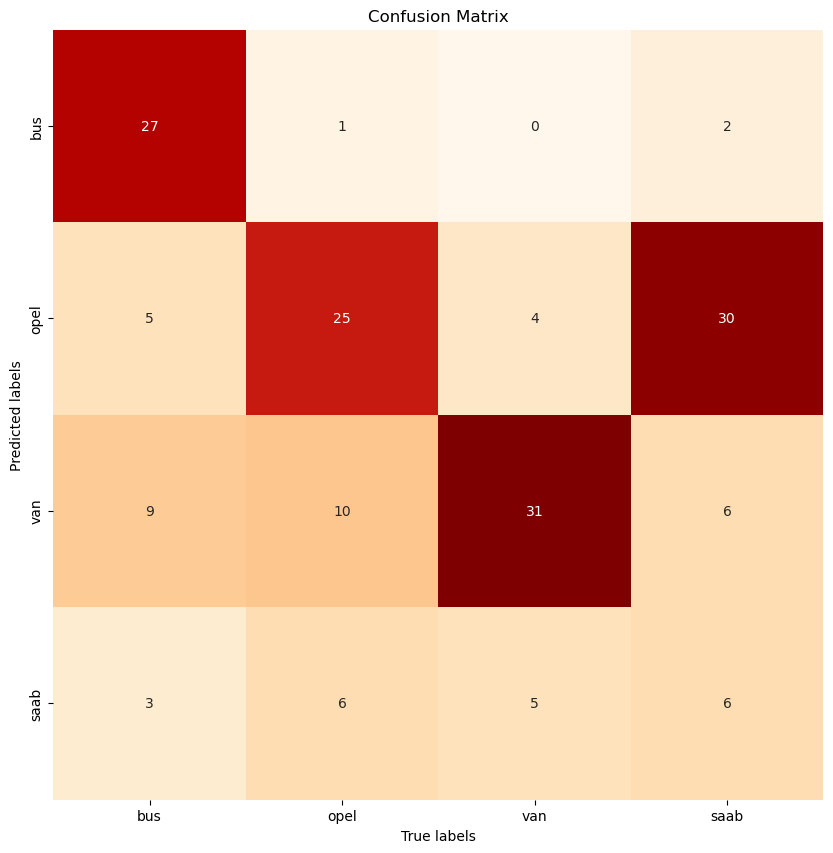

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,ax=ax,cmap="OrRd")
plt.xlabel('true label')
plt.ylabel('predicted label')


plt.subplot().set_xlabel('True labels');ax.set_ylabel('Predicted labels'); 
plt.subplot().set_title('Confusion Matrix'); 
plt.subplot().xaxis.set_ticklabels(label); ax.yaxis.set_ticklabels(label);



In [90]:
## chaning the priors
gaussian = GaussianNB(priors=[0.25,0.10, 0.4, 0.25])

 

In [91]:
gaussian.fit(x_train_sml_log, y_train.values.ravel() )

GaussianNB(priors=[0.25, 0.1, 0.4, 0.25])

In [92]:
acc_gaussian_train = round(gaussian.score(x_train_sml_log, y_train) * 100, 2)
print("Accuracy of the small logtransformed training set after changing the priors: ", acc_gaussian_train)

Accuracy of the small logtransformed training set after changing the priors:  56.36


In [93]:
scores = cross_val_score(gaussian, x_train_sml_log,y_train.values.ravel(), cv=10, scoring="accuracy")
print(scores)
meanScore= scores.mean()
print('results of 10-fold cross validation: ', meanScore*100)

[0.54411765 0.5        0.52941176 0.51470588 0.54411765 0.51470588
 0.56716418 0.50746269 0.58208955 0.55223881]
results of 10-fold cross validation:  53.56014047410007
